# Loading modules

In [1]:
%pylab inline
plt.style.use("default")
import os, sys
import scipy
import pandas as pd
import helpers as h
from helpers import abib_cdf
from glob import glob
from scipy.io import loadmat
from collections import Counter
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

plt.rcParams['figure.figsize'] = (15, 10) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Loading data

In [2]:
data0=pd.read_csv("/Users/duuta/ppp/data/pipeline_data0.csv")
position_data = pd.read_csv("/Users/duuta/ppp/data/pipeline_spont.csv")
centers_data = pd.read_csv("/Users/duuta/ppp/data/pipeline_centers.csv")

In [3]:
data0.shape

(45271, 4)

# stimulus counts

In [4]:
xc = [ [(280, 10103)],
 [(5880, 10103)],
 [(335, 10145)],
 [(6956, 10145)],
 [(4696, 11449)],
 [(5426, 11449)],
 [(2565, 14062)],
 [(5658, 14062)],
[(335, 9476)],
 [(6980, 9476)],
[(280, 10079)],
 [(5880, 10079)]]

In [5]:
sum(xc, axis=0)

array([[ 45271, 130628]])

In [6]:
data0.head()

,mean,std,skew,type
0,36.442448,68.303040,8.160747,0
1,37.194590,70.668830,7.412004,0
2,35.332314,73.627754,9.495235,0
3,31.089615,62.916310,11.186022,0
4,43.714600,92.382540,8.392061,0


# check on spont vs evoked activity

In [7]:
Xall = data0[['mean', 'std', 'skew']].to_numpy()
yall = data0['type'].to_numpy()



In [8]:
print(Counter(yall))

Counter({1: 36780, 0: 8491})


In [9]:
inzero = where(yall==0)[0]
inone = where(yall==1)[0]

In [10]:
inzero_ = random.choice(inzero, size=8000, replace=False)
inone_ = random.choice(inone, size=8000, replace=False)

In [11]:
X = vstack([Xall[inzero_], Xall[inone_]])
y = hstack([yall[inzero_], yall[inone_]])
#X = X[:, 2:3]
X.shape

(16000, 3)

In [12]:
abib_pipeline0 = LDA()

In [13]:
abib_pipeline0.fit(X, y).score(X, y)

0.733

In [14]:
scores_er  = cross_val_score(abib_pipeline0, X,y, cv=5)

print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_er.mean(), scores_er.std()))

0.733 accuracy with a standard deviation of 0.005


In [15]:
scores  = cross_val_score(abib_pipeline0, X,y, cv=5, scoring='f1_macro')

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# why is f1_score useful for imbalanced data?

0.73 accuracy with a standard deviation of 0.01


Text(0.5, 1.0, 'Spontaneous vs Evoked ')

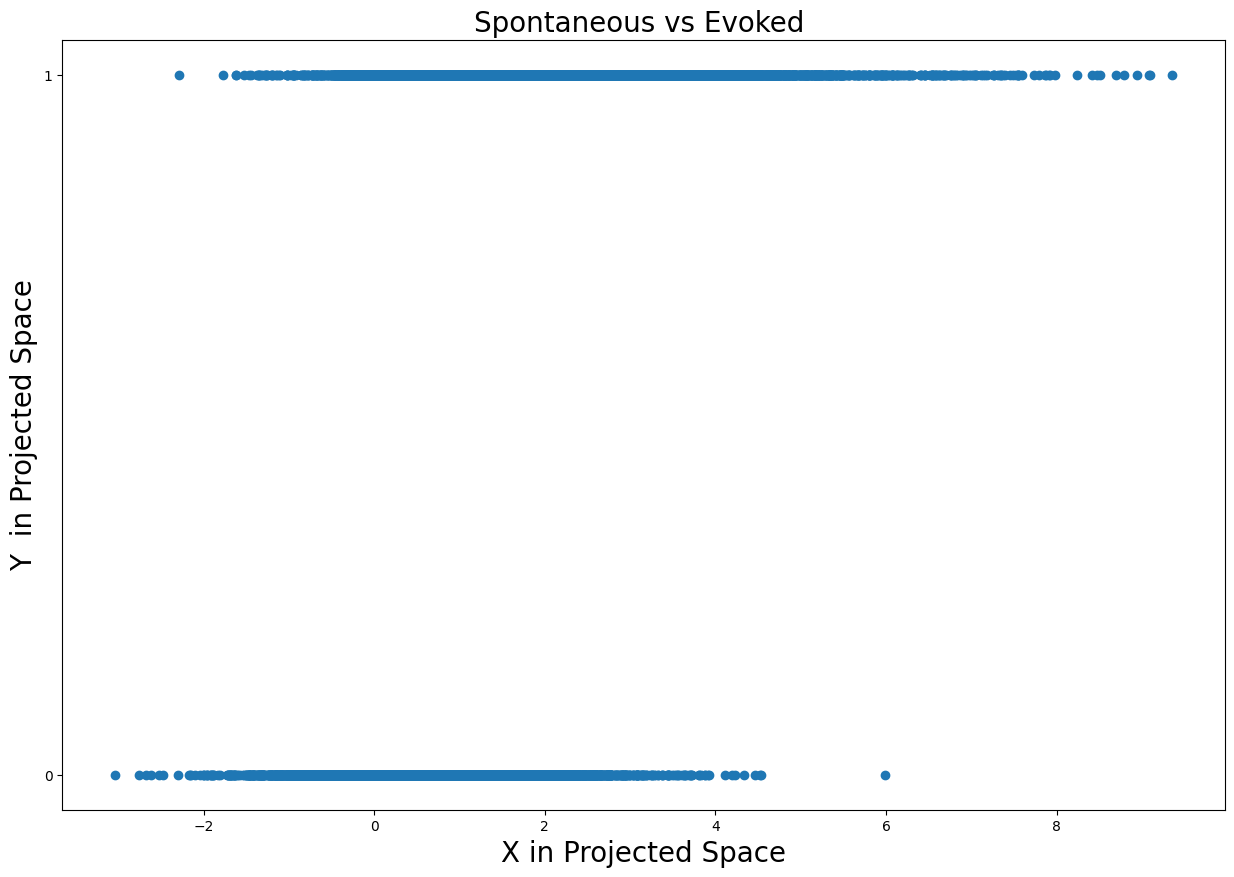

In [20]:
plot(X @ abib_pipeline0.coef_[0], y, 'o')
ylabel("Y  in Projected Space", fontsize=20)
xlabel("X in Projected Space", fontsize=20)
yticks([0, 1])
title("Spontaneous vs Evoked ", fontsize=20)

In [21]:
abib_pipeline0.coef_

array([[ 0.06448705,  0.01447444, -0.13807503]])

In [22]:
projX = X @ abib_pipeline0.coef_[0]

In [23]:
projX[where(y==0)]

array([ 0.2029594 ,  0.33804927,  0.3799742 , ...,  1.03476365,
        1.73137086, -0.14795326])

Dropped 0 values less than r_min=-inf
Dropped 0 values less than r_min=-inf


Text(0.5, 1.0, 'Cumulative distributions of projected spontaneous and response')

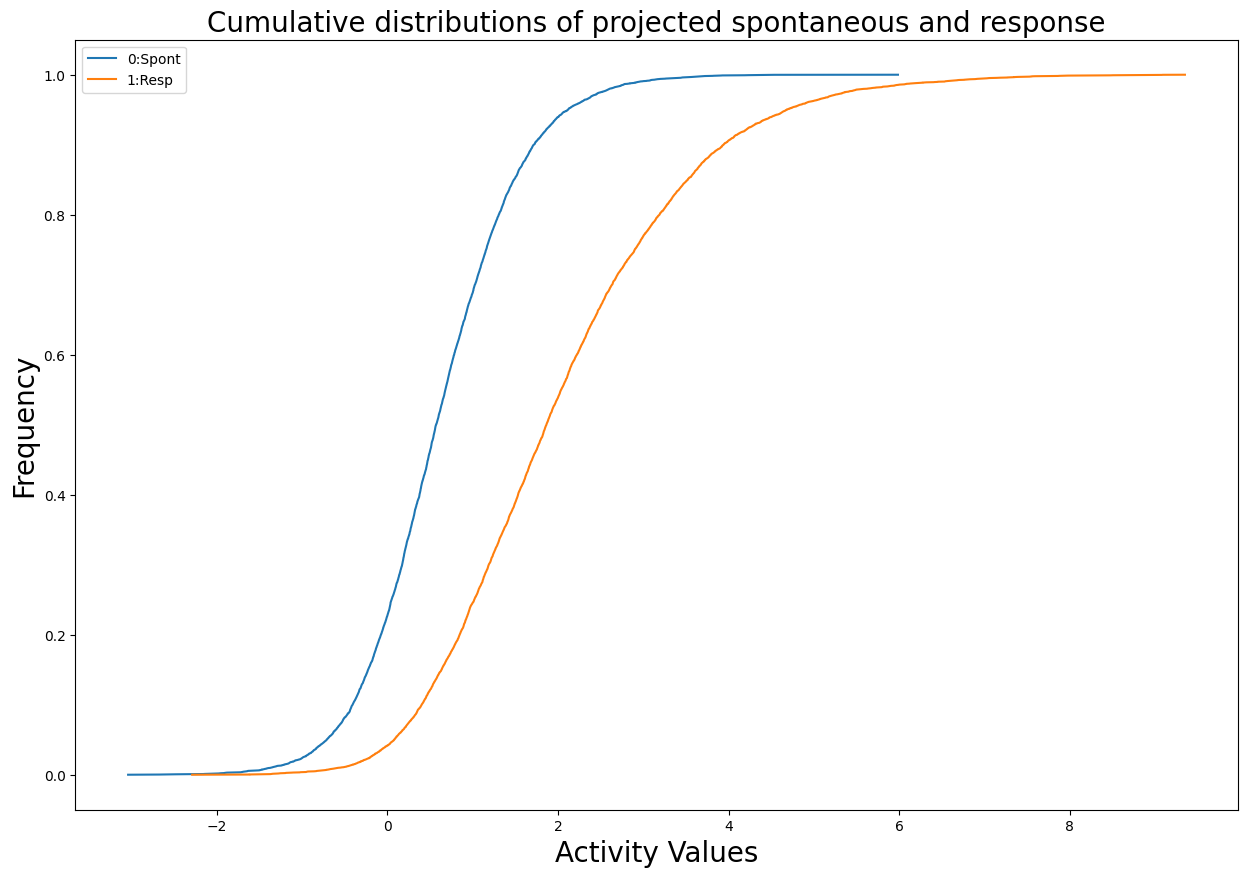

In [24]:
h.abib_cdf(projX[where(y==0)]) 
h.abib_cdf(projX[where(y==1)])
xlabel('Activity Values', fontsize=20)
ylabel('Frequency', fontsize=20 )
legend(['0:Spont', '1:Resp'])
title("Cumulative distributions of projected spontaneous and response", fontsize=20)

Text(0.5, 1.0, 'Distributions of projected spontaneous and response in feature space')

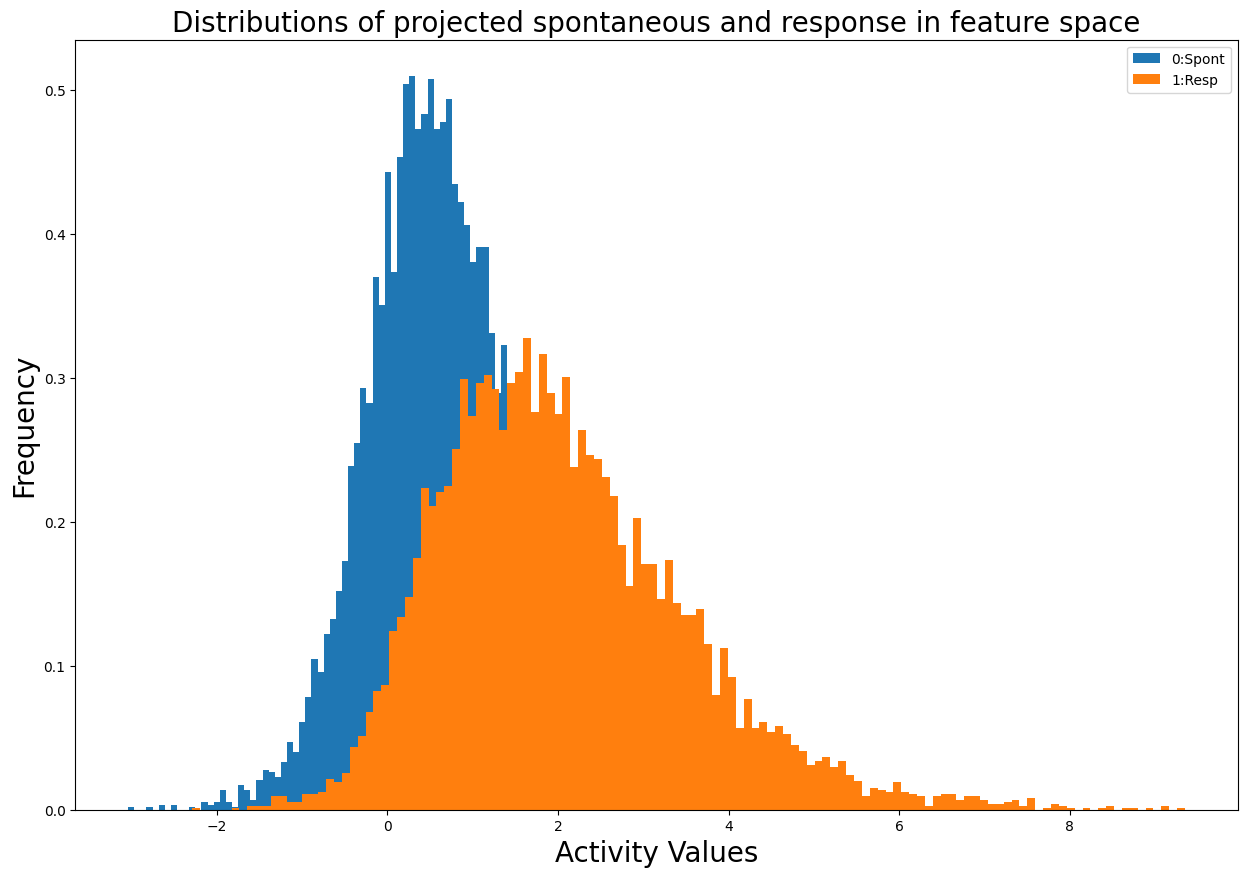

In [25]:
hist(projX[where(y==0)], bins=int(sqrt(16000)), density=True) 
hist(projX[where(y==1)], bins=int(np.sqrt(16000)),  density=True)
xlabel('Activity Values', fontsize=20)
ylabel('Frequency', fontsize=20 )
legend(['0:Spont', '1:Resp'])
title("Distributions of projected spontaneous and response in feature space", fontsize=20)

In [26]:
X.shape

(16000, 3)

Dropped 0 values less than r_min=-inf
Dropped 0 values less than r_min=-inf


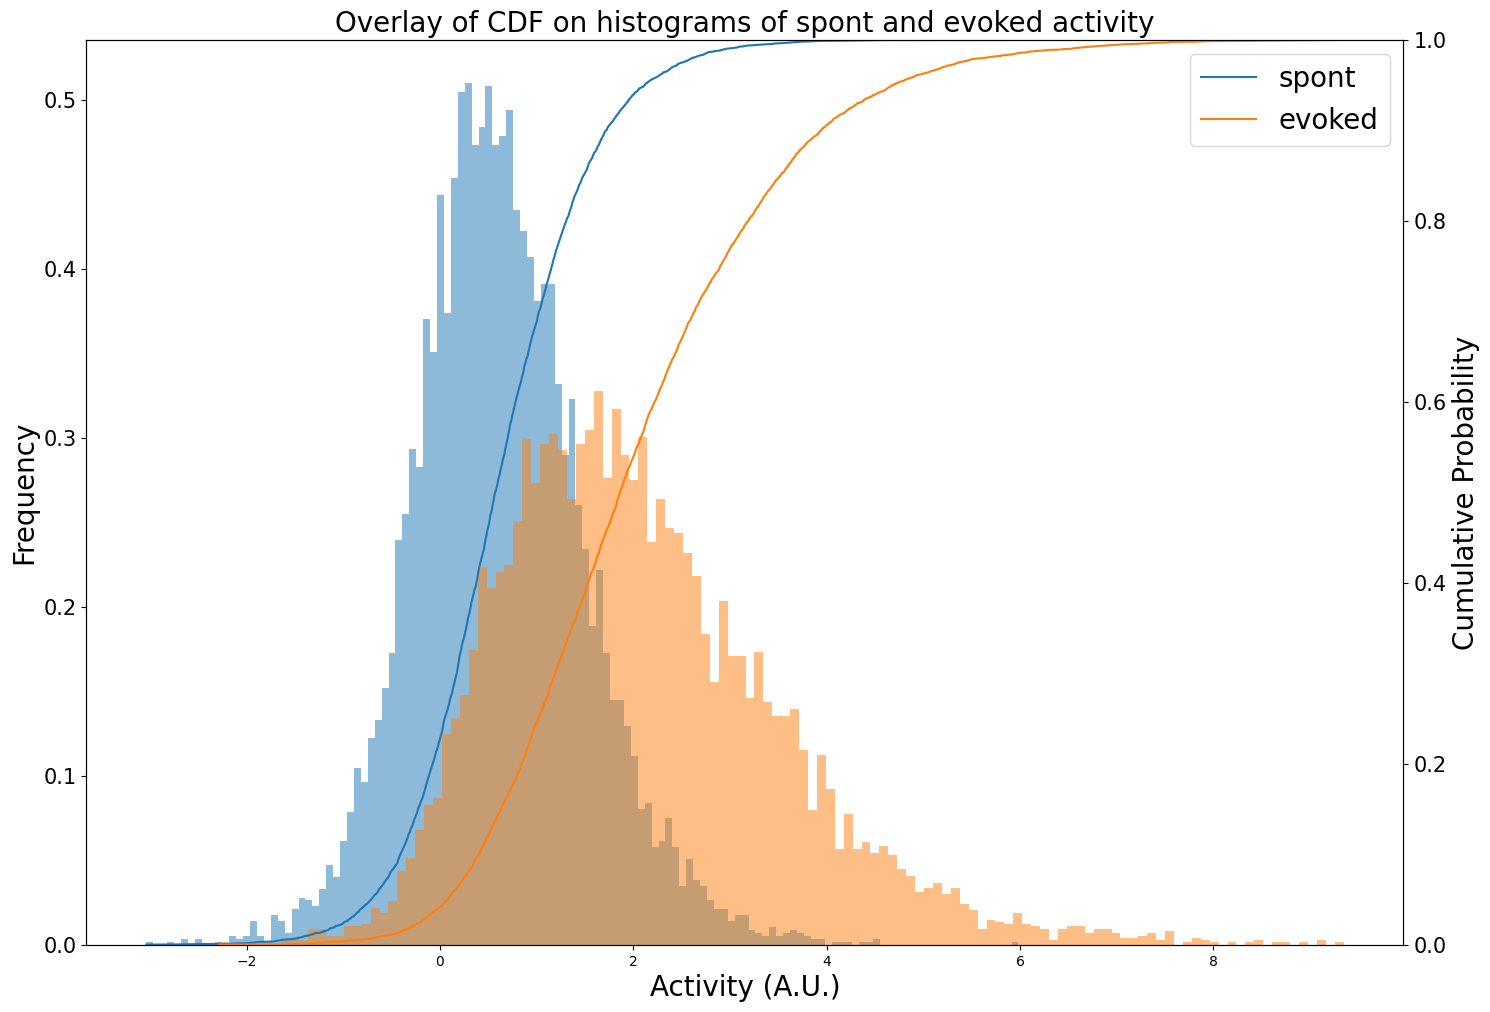

In [28]:
fig, ax1 = plt.subplots()


ax1.set_xlabel('Activity (A.U.)', fontsize=20)
ax1.set_ylabel('Frequency', fontsize=20)
ax1.hist(projX[where(y==0)], bins=int(sqrt(16000)), label='spont', density=True, alpha=0.5) 
ax1.hist(projX[where(y==1)], bins=int(np.sqrt(16000)), label='resp', density=True, alpha=0.5)
ax1.tick_params(axis='y', labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('cumulative sums', fontsize=20)  # we already handled the x-label with ax1
abib_cdf(projX[where(y==0)]) 
abib_cdf(projX[where(y==1)])
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylim(0, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Overlay of CDF on histograms of spont and evoked activity", fontsize=20)
plt.legend(['spont', 'evoked'], fontsize=20)
plt.show()




# check position

In [29]:
X0 = position_data[['mean', 'std', 'skew']].to_numpy()
y0 = position_data['type'].to_numpy()

In [30]:
abib_pipeline = LDA()

In [31]:
scores_lda0  = cross_val_score(abib_pipeline, X0,y0, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_lda0.mean(), scores_lda0.std()))

0.50 accuracy with a standard deviation of 0.00


/Users/duuta/ppp/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:538: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = (S**2 / xp.sum(S**2))[
/Users/duuta/ppp/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:538: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = (S**2 / xp.sum(S**2))[
/Users/duuta/ppp/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:538: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = (S**2 / xp.sum(S**2))[


# split along X 

In [32]:
split_on_x_data = pd.read_csv('/Users/duuta/ppp/data/pipeline_spilt_on_x.csv')

In [33]:
X00 = split_on_x_data[['mean', 'std', 'skew']].to_numpy()
y00 = split_on_x_data['type'].to_numpy()

In [34]:
split_on_x_data

,mean,std,skew,type
0,36.442448,68.303040,8.160747,0
1,37.194590,70.668830,7.412004,0
2,35.332314,73.627754,9.495235,0
3,31.089615,62.916310,11.186022,0
4,43.714600,92.382540,8.392061,0
...,...,...,...,...
8486,20.243036,75.020386,14.616104,1
8487,7.924827,31.799845,12.234324,1
8488,7.012734,25.982895,11.578600,1
8489,10.379638,46.305440,14.242825,1


In [35]:
abib_pipeline00 = LDA()

In [36]:
scores00 = cross_val_score(abib_pipeline00, X00, y00, cv=5)

print("%0.3f accuracy with a standard deviation of %0.3f" % (scores00.mean(), scores00.std()))

0.552 accuracy with a standard deviation of 0.070


In [37]:
abib_pipeline00.fit(X00, y00).score(X00, y00)

0.5676598751619362

Text(0.5, 1.0, 'Simulated location for Spontaneous Activity')

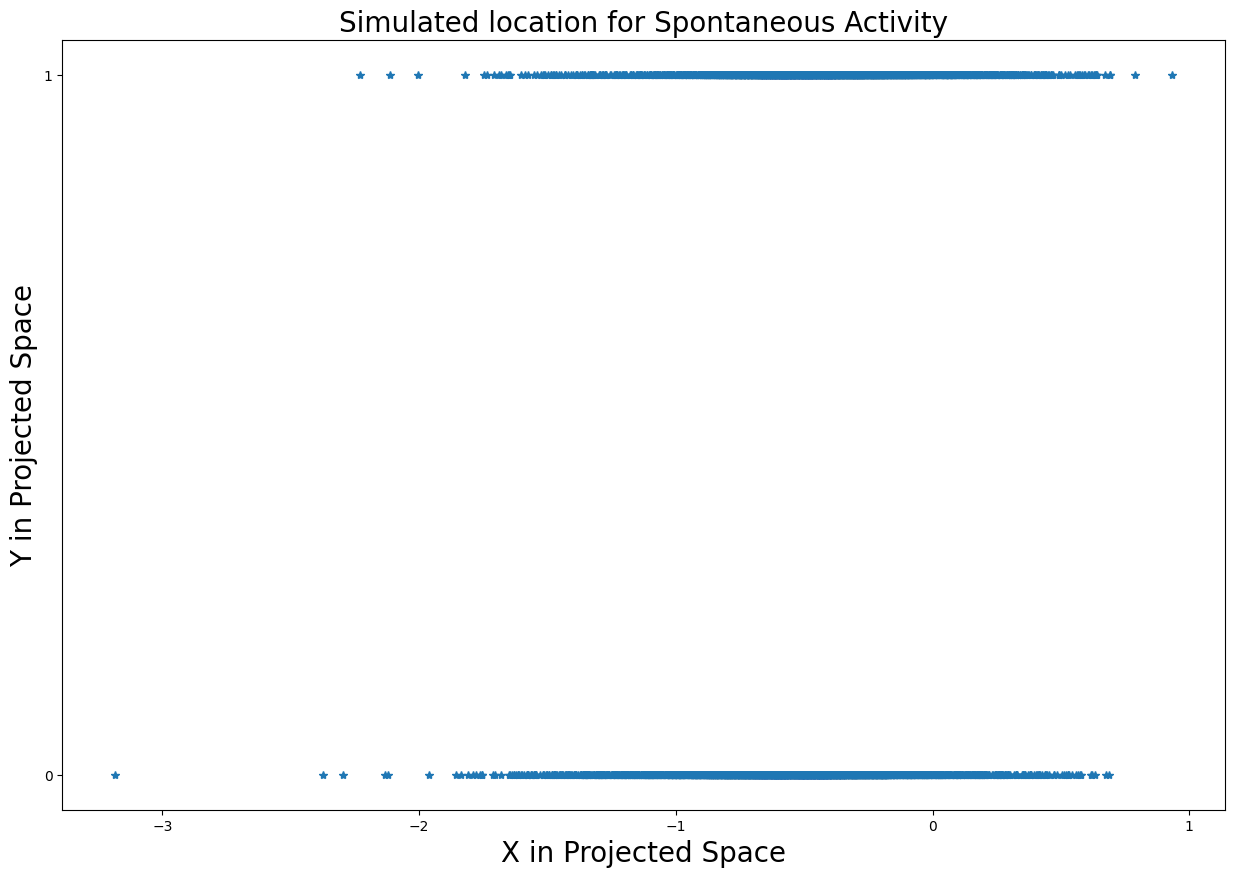

In [38]:
plot(X00 @ abib_pipeline00.coef_[0], y00, '*')
ylabel("Y in Projected Space", fontsize=20)
xlabel("X in Projected Space", fontsize=20)
yticks([0, 1])
title("Simulated location for Spontaneous Activity", fontsize=20)

In [40]:
projX00 = X00 @ abib_pipeline00.coef_[0]
n00 = X00.__len__()

Dropped 0 values less than r_min=-inf
Dropped 0 values less than r_min=-inf


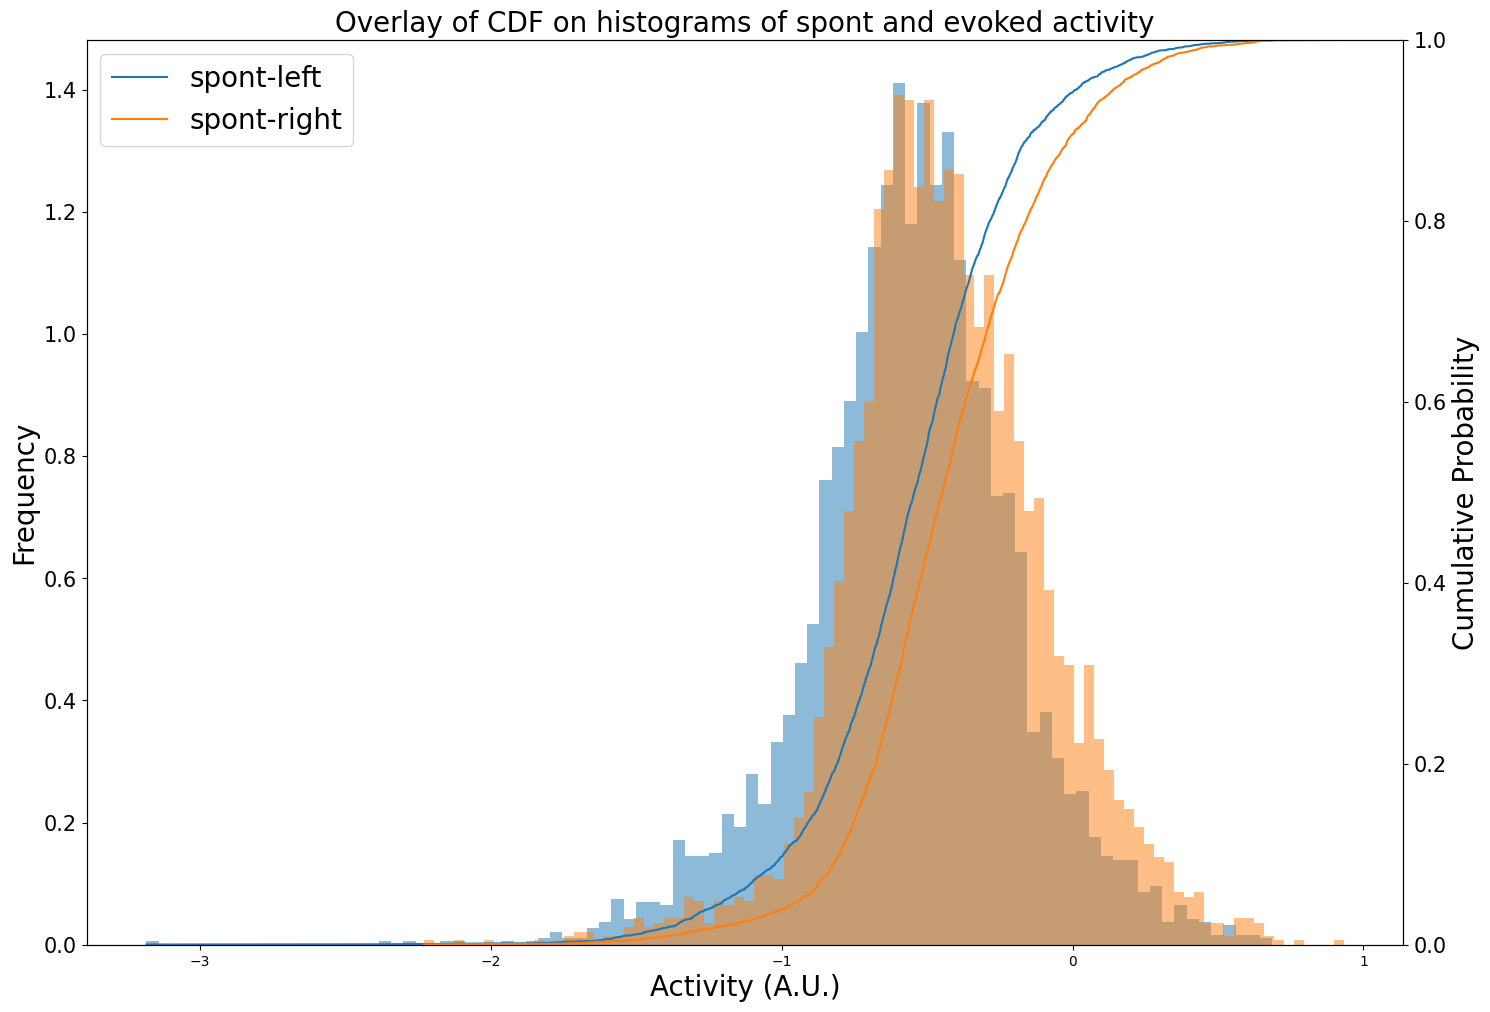

In [42]:
# plot for split on X 
fig, ax1 = plt.subplots()


ax1.set_xlabel('Activity (A.U.)', fontsize=20)
ax1.set_ylabel('Frequency', fontsize=20)
ax1.hist(projX00[where(y00==0)], bins=int(sqrt(n00)), label='spont', density=True, alpha=0.5) 
ax1.hist(projX00[where(y00==1)], bins=int(np.sqrt(n00)), label='resp', density=True, alpha=0.5)
ax1.tick_params(axis='y', labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('cumulative sums', fontsize=20)  # we already handled the x-label with ax1
abib_cdf(projX00[where(y00==0)]) 
abib_cdf(projX00[where(y00==1)])
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylim(0, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Overlay of CDF on histograms of spont and evoked activity", fontsize=20)
plt.legend(['spont-left', 'spont-right'], fontsize=20)
plt.show()


# split along Y 

In [44]:
split_on_y_data = pd.read_csv('/Users/duuta/ppp/data/pipeline_spilt_on_y.csv')

In [45]:
split_on_y_data.shape

(8491, 4)

In [46]:
abib_pipeline10 = LDA()

In [47]:
# Check centers
X10 = split_on_y_data[['mean', 'std', 'skew']].to_numpy()
y10 = split_on_y_data['type'].to_numpy()

In [48]:
scores10 = cross_val_score(abib_pipeline10, X10, y10, cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores10.mean(), scores10.std()))

0.552 accuracy with a standard deviation of 0.070


In [49]:
abib_pipeline10.fit(X10, y10).score(X10, y10)

0.5676598751619362

Text(0.5, 1.0, 'Simulated location for Spontaneous Activity')

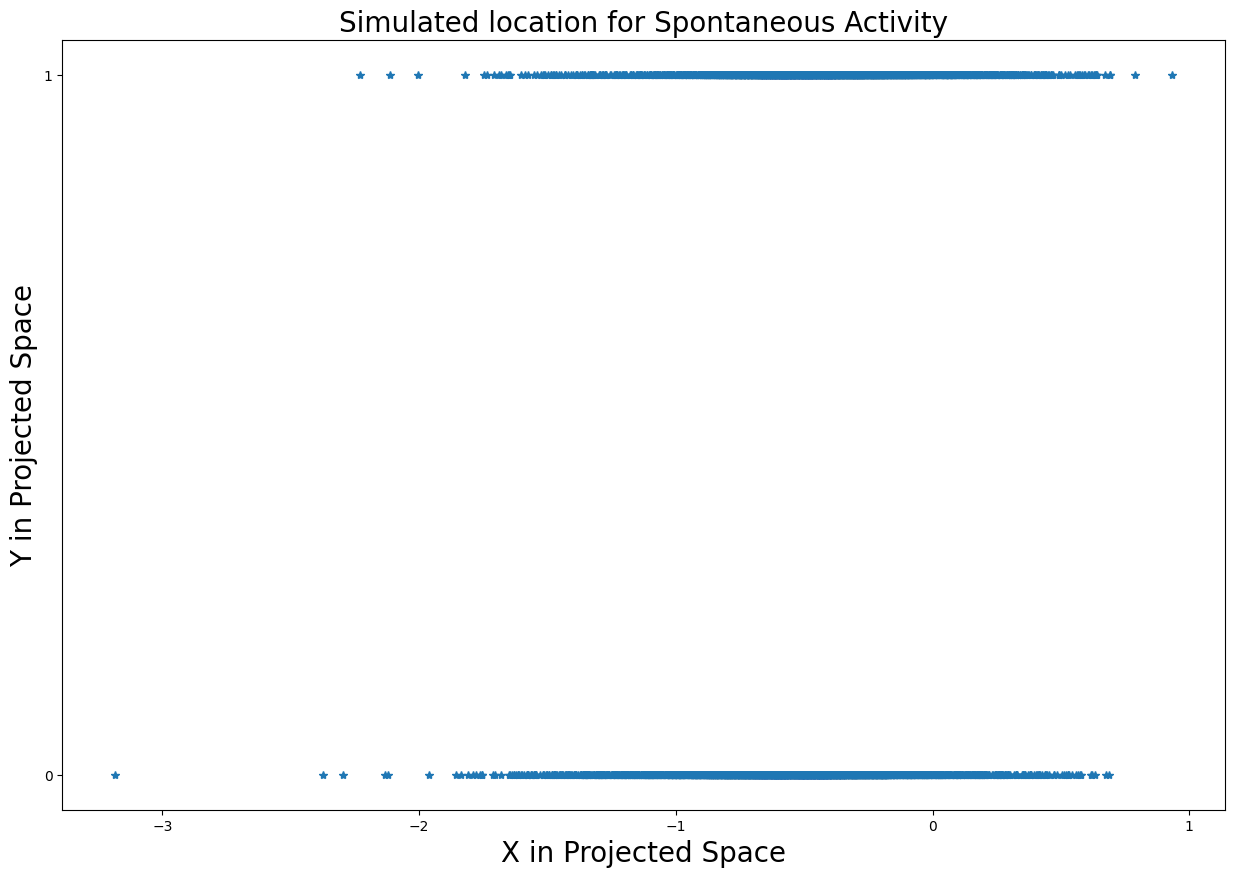

In [50]:
plot(X10 @ abib_pipeline10.coef_[0], y10, '*')
ylabel("Y in Projected Space", fontsize=20)
xlabel("X in Projected Space", fontsize=20)
yticks([0, 1])
title("Simulated location for Spontaneous Activity", fontsize=20)

In [51]:
projX10 = X10 @ abib_pipeline10.coef_[0]
n10 = X10.__len__()

Dropped 0 values less than r_min=-inf
Dropped 0 values less than r_min=-inf


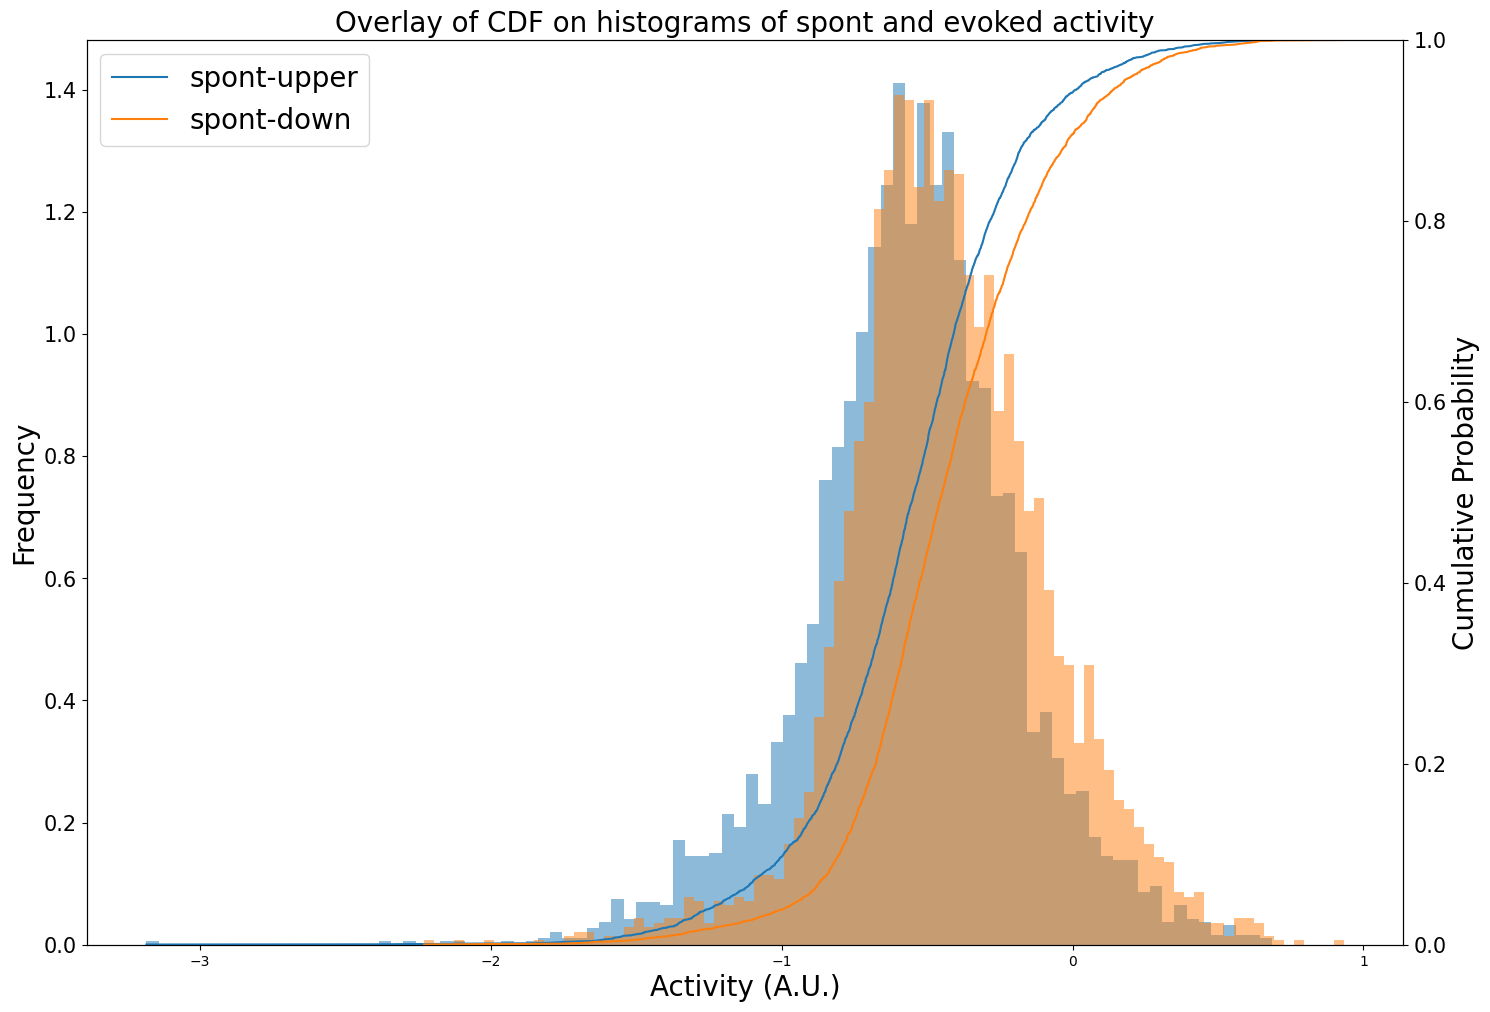

In [52]:
fig, ax1 = plt.subplots()


ax1.set_xlabel('Activity (A.U.)', fontsize=20)
ax1.set_ylabel('Frequency', fontsize=20)
ax1.hist(projX10[where(y10==0)], bins=int(sqrt(n10)), label='spont-up', density=True, alpha=0.5) 
ax1.hist(projX10[where(y10==1)], bins=int(np.sqrt(n10)), label='spont-down', density=True, alpha=0.5)
ax1.tick_params(axis='y', labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('cumulative sums', fontsize=20)  # we already handled the x-label with ax1
abib_cdf(projX10[where(y10==0)]) 
abib_cdf(projX10[where(y10==1)])
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylim(0, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Overlay of CDF on histograms of spont and evoked activity", fontsize=20)
plt.legend(['spont-upper', 'spont-down'], fontsize=20)
plt.show()


